<a href="https://colab.research.google.com/github/catastropiyush/LLMon/blob/main/Llama_3_1_8b_%2B_Unsloth_2x_faster_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
  <a href="https://github.com/unslothai/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/u54VK8m8tk"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
  <a href="https://ko-fi.com/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Kofi button.png" width="145"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://github.com/unslothai/unsloth?tab=readme-ov-file#-installation-instructions).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save) (eg for Llama.cpp).

[NEW] Llama-3.1 8b, 70b & 405b are trained on a crazy 15 trillion tokens with 128K long context lengths!

**[NEW] Try 2x faster inference in a free Colab for Llama-3.1 8b Instruct [here](https://colab.research.google.com/drive/1T-YBVfnphoVc8E2E854qF3jdia2Ll2W2?usp=sharing)**

In [1]:
%%capture
# Installs Unsloth, Xformers (Flash Attention) and all other packages!
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

# We have to check which Torch version for Xformers (2.3 -> 0.0.27)
from torch import __version__; from packaging.version import Version as V
xformers = "xformers==0.0.27" if V(__version__) < V("2.4.0") else "xformers"
!pip install --no-deps {xformers} trl peft accelerate bitsandbytes triton

* We support Llama, Mistral, Phi-3, Gemma, Yi, DeepSeek, Qwen, TinyLlama, Vicuna, Open Hermes etc
* We support 16bit LoRA or 4bit QLoRA. Both 2x faster.
* `max_seq_length` can be set to anything, since we do automatic RoPE Scaling via [kaiokendev's](https://kaiokendev.github.io/til) method.
* [**NEW**] We make Gemma-2 9b / 27b **2x faster**! See our [Gemma-2 9b notebook](https://colab.research.google.com/drive/1vIrqH5uYDQwsJ4-OO3DErvuv4pBgVwk4?usp=sharing)
* [**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)
* [**NEW**] We make Mistral NeMo 12B 2x faster and fit in under 12GB of VRAM! [Mistral NeMo notebook](https://colab.research.google.com/drive/17d3U-CAIwzmbDRqbZ9NnpHxCkmXB6LZ0?usp=sharing)

In [2]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # New Mistral 12b 2x faster!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.8: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.0+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

We now add LoRA adapters so we only need to update 1 to 10% of all parameters!

In [3]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2024.8 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


<a name="Data"></a>
### Data Prep
We now use the Alpaca dataset from [yahma](https://huggingface.co/datasets/yahma/alpaca-cleaned), which is a filtered version of 52K of the original [Alpaca dataset](https://crfm.stanford.edu/2023/03/13/alpaca.html). You can replace this code section with your own data prep.

**[NOTE]** To train only on completions (ignoring the user's input) read TRL's docs [here](https://huggingface.co/docs/trl/sft_trainer#train-on-completions-only).

**[NOTE]** Remember to add the **EOS_TOKEN** to the tokenized output!! Otherwise you'll get infinite generations!

If you want to use the `llama-3` template for ShareGPT datasets, try our conversational [notebook](https://colab.research.google.com/drive/1XamvWYinY6FOSX9GLvnqSjjsNflxdhNc?usp=sharing).

For text completions like novel writing, try this [notebook](https://colab.research.google.com/drive/1ef-tab5bhkvWmBOObepl1WgJvfvSzn5Q?usp=sharing).

In [5]:
# Load the CSV data file using pandas
import pandas as pd
df = pd.read_csv('/content/mp-20-train-POSCAR.csv')

In [6]:
df

,material_id,formation_energy_per_atom,band_gap,pretty_formula,e_above_hull,elements,cif,spacegroup.number,POSCAR
0,mp-1221227,-1.637460,0.2133,Na3MnCoNiO6,0.043001,"['Co', 'Mn', 'Na', 'Ni', 'O']",# generated using pymatgen\ndata_Na3MnCoNiO6\n...,8,Na Mn Co Ni O \n 1.0000000000000000\n 7.97...
1,mp-974729,-0.314759,0.0000,Nd(Al2Cu)4,0.000000,"['Al', 'Cu', 'Nd']",# generated using pymatgen\ndata_Nd(Al2Cu)4\n_...,139,Nd Al Cu\n 1.0000000000000000\n 6.80986359...
2,mp-1185360,-0.193761,0.0000,LiMnIr2,0.018075,"['Ir', 'Li', 'Mn']",# generated using pymatgen\ndata_LiMnIr2\n_sym...,225,Li Mn Ir\n 1.0000000000000000\n 4.16442335...
3,mp-1188861,-0.584694,3.8556,LiCSN,0.048847,"['C', 'Li', 'N', 'S']",# generated using pymatgen\ndata_LiCSN\n_symme...,62,Li C S N \n 1.0000000000000000\n 3.85878...
4,mp-677272,-2.474759,0.4707,La2EuS4,0.000000,"['Eu', 'La', 'S']",# generated using pymatgen\ndata_La2EuS4\n_sym...,122,La Eu S \n 1.0000000000000000\n 7.58418904...
...,...,...,...,...,...,...,...,...,...
27131,mp-568116,-0.988502,3.7614,Lu2(CN2)3,0.045185,"['C', 'Lu', 'N']",# generated using pymatgen\ndata_Lu2(CN2)3\n_s...,155,Lu C N \n 1.0000000000000000\n 6.16302851...
27132,mp-865529,-0.640955,0.0000,Ti2NiIr,0.000000,"['Ti', 'Ni', 'Ir']",# generated using pymatgen\ndata_Ti2NiIr\n_sym...,225,Ti Ni Ir\n 1.0000000000000000\n 4.33243052...
27133,mp-1189241,-0.756019,0.0000,GdAs2Au,0.010305,"['As', 'Au', 'Gd']",# generated using pymatgen\ndata_GdAs2Au\n_sym...,64,Gd As Au\n 1.0000000000000000\n 4.04655658...
27134,mp-1104538,-0.104870,0.0000,Tm(FeSn)6,0.021206,"['Fe', 'Sn', 'Tm']",# generated using pymatgen\ndata_Tm(FeSn)6\n_s...,191,Tm Fe Sn\n 1.0000000000000000\n 5.41199598...


In [7]:
df.head(2)

,material_id,formation_energy_per_atom,band_gap,pretty_formula,e_above_hull,elements,cif,spacegroup.number,POSCAR
0,mp-1221227,-1.637460,0.2133,Na3MnCoNiO6,0.043001,"['Co', 'Mn', 'Na', 'Ni', 'O']",# generated using pymatgen\ndata_Na3MnCoNiO6\n...,8,Na Mn Co Ni O \n 1.0000000000000000\n 7.97...
1,mp-974729,-0.314759,0.0000,Nd(Al2Cu)4,0.000000,"['Al', 'Cu', 'Nd']",# generated using pymatgen\ndata_Nd(Al2Cu)4\n_...,139,Nd Al Cu\n 1.0000000000000000\n 6.80986359...


In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs       = examples["input"]
    outputs      = examples["output"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

from datasets import load_dataset
dataset = load_dataset("yahma/alpaca-cleaned", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

Generating train split:   0%|          | 0/51760 [00:00<?, ? examples/s]

Map:   0%|          | 0/51760 [00:00<?, ? examples/s]

In [8]:
from datasets import Dataset

alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token  # Ensure EOS_TOKEN is defined from your tokenizer

def formatting_prompts_func(df):
    instructions = """You are a random material predictor. The general structure of a POSCAR is:
    Si
    3.9
    0.50000000 0.50000000 0.00000000
    0.00000000 0.50000000 0.50000000
    0.50000000 0.00000000 0.50000000
      1
    cartesian
    0.00000000 0.00000000 0.00000000
    """
    inputs = "Generate a random POSCAR."
    texts = []
    for _, row in df.iterrows():
        # Ensure the output ends with EOS_TOKEN
        output = row["POSCAR"]
        text = alpaca_prompt.format(instructions, inputs, output) + EOS_TOKEN
        texts.append(text)
    return {"text": texts}

# Assuming df is your DataFrame
formatted_data = formatting_prompts_func(df)
# Create a dataset from the formatted data
dataset = Dataset.from_dict(formatted_data)

In [9]:
dataset

Dataset({
    features: ['text'],
    num_rows: 27136
})

In [12]:
dataset[0]

{'text': 'Below is an instruction that describes a task, paired with an input that provides further context. Write a response that completes the request.\n\n### Instruction:\nYou are a random material predictor. The general structure of a POSCAR is:\n    Si\n    3.9\n    0.50000000 0.50000000 0.00000000\n    0.00000000 0.50000000 0.50000000\n    0.50000000 0.00000000 0.50000000\n      1\n    cartesian\n    0.00000000 0.00000000 0.00000000\n    \n\n### Input:\nGenerate a random POSCAR.\n\n### Response:\nNa Mn Co Ni O \n 1.0000000000000000\n     7.9776275500000002    0.0000000000000000    0.0000000000000000\n     7.4024840310562654    2.9741841732609613    0.0000000000000000\n     1.6961844344827754    0.3280057412706885    5.3658570006940387\n Na  Mn  Co  Ni  O  \n   3   1   1   1   6\nCartesian\n  5.1321257202704240  0.9924431960047929  0.0095780547462389\n 17.0739378110950888  3.3017338882994895  5.3643813900188473\n 11.9623564197620453  2.3132635254990475  5.3425799130250287\n  8.542

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

In [10]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

Map (num_proc=2):   0%|          | 0/27136 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.748 GB.
5.984 GB of memory reserved.


In [13]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 27,136 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,2.270300
2,2.293400
3,2.340600
4,2.445800
5,1.853900
6,1.894300
7,1.938500
8,1.737900
9,1.241200
10,1.738900


In [14]:
#@title Plot the loss curve
!pip install smplotlib
import smplotlib
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 13.3 MB/s eta 0:00:00


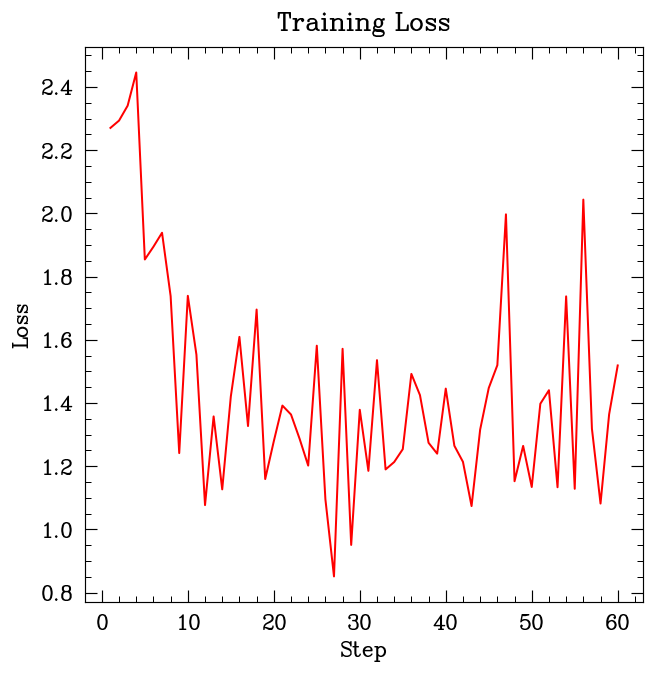

In [15]:
import pandas as pd
df_loss = pd.DataFrame(trainer.state.log_history)
plt.plot(df_loss['step'], df_loss['loss'],color="red")
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [17]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

NameError: name 'start_gpu_memory' is not defined

<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

**[NEW] Try 2x faster inference in a free Colab for Llama-3.1 8b Instruct [here](https://colab.research.google.com/drive/1T-YBVfnphoVc8E2E854qF3jdia2Ll2W2?usp=sharing)**

In [19]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        """You are a random material predictor. The general structure of a POSCAR is:
        Si
        3.9
        0.50000000 0.50000000 0.00000000
        0.00000000 0.50000000 0.50000000
        0.50000000 0.00000000 0.50000000
        1
        cartesian
        0.00000000 0.00000000 0.00000000
    """, # instruction
        "Generate a random POSCAR", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that completes the request.\n\n### Instruction:\nYou are a random material predictor. The general structure of a POSCAR is:\n        Si\n        3.9\n        0.50000000 0.50000000 0.00000000\n        0.00000000 0.50000000 0.50000000\n        0.50000000 0.00000000 0.50000000\n        1\n        cartesian\n        0.00000000 0.00000000 0.00000000\n    \n\n### Input:\nGenerate a random POSCAR\n\n### Response:\nY  Mn  O \n 1.0000000000000000\n     5.6238970000000002    0.0000000000000000    0.0000000000000000\n     2.8119489999999998    5.623897000']

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [24]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        """You are a random material predictor. The general structure of a POSCAR is:
        Si
        3.9
        0.50000000 0.50000000 0.00000000
        0.00000000 0.50000000 0.50000000
        0.50000000 0.00000000 0.50000000
        1
        cartesian
        0.00000000 0.00000000 0.00000000
    """, # instruction
        "Generate a random POSCAR.The coordinates should be till 5 significant digits.", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 512)

<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that completes the request.

### Instruction:
You are a random material predictor. The general structure of a POSCAR is:
        Si
        3.9
        0.50000000 0.50000000 0.00000000
        0.00000000 0.50000000 0.50000000
        0.50000000 0.00000000 0.50000000
        1
        cartesian
        0.00000000 0.00000000 0.00000000
    

### Input:
Generate a random POSCAR.The coordinates should be till 5 significant digits.

### Response:
Tb Cd C  O 
 1.0000000000000000
     4.9999999999999998    0.0000000000000000    0.0000000000000000
     0.0000000000000000    4.9999999999999998    0.0000000000000000
     0.0000000000000000    0.0000000000000000    4.9999999999999998
 Tb  Cd  C   O  
   1   1   2   2
Cartesian
  1.0000000000000000  1.0000000000000000  1.0000000000000000
  3.9999999999999998  3.9999999999999998  3.9999999999999998
  2.999999999999999

In [25]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.2 MB/s eta 0:00:00


In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from ase.geometry.analysis import Analysis
from ase.visualize.plot import plot_atoms
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

In [31]:
%%writefile POSCAR
fcc Si
3.9
 0.50000000 0.50000000 0.00000000
 0.00000000 0.50000000 0.50000000
 0.50000000 0.00000000 0.50000000
  1
cartesian
0.00000000 0.00000000 0.00000000


Overwriting POSCAR


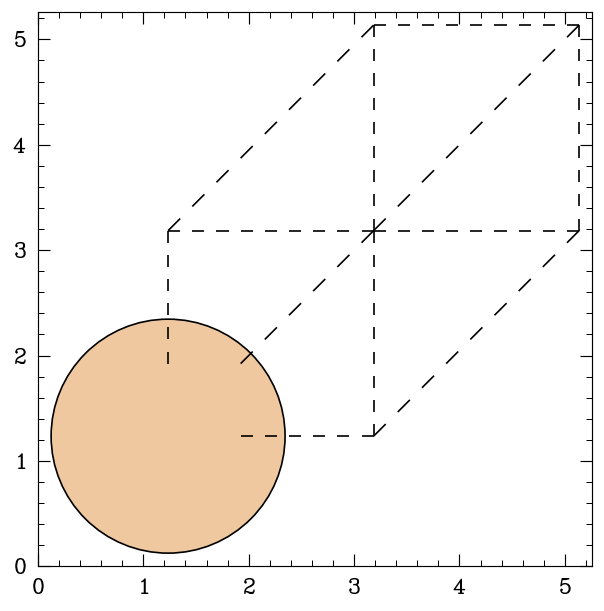

In [32]:
atoms = read("/content/POSCAR")
plot_atoms(atoms)
plt.show()

<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference

# alpaca_prompt = You MUST copy from above!

inputs = tokenizer(
[
    alpaca_prompt.format(
        "What is a famous tall tower in Paris?", # instruction
        "", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
What is a famous tall tower in Paris?

### Input:


### Response:
One of the most famous and iconic tall towers in Paris is the Eiffel Tower. Standing at 324 meters (1,063 feet) tall, this wrought iron tower is a symbol of the city and a must-see attraction for tourists from all over the world.<|end_of_text|>


You can also use Hugging Face's `AutoModelForPeftCausalLM`. Only use this if you do not have `unsloth` installed. It can be hopelessly slow, since `4bit` model downloading is not supported, and Unsloth's **inference is 2x faster**.

In [ ]:
if False:
    # I highly do NOT suggest - use Unsloth if possible
    from peft import AutoPeftModelForCausalLM
    from transformers import AutoTokenizer
    model = AutoPeftModelForCausalLM.from_pretrained(
        "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = load_in_4bit,
    )
    tokenizer = AutoTokenizer.from_pretrained("lora_model")

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Merge to 16bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")

# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "")

# Just LoRA adapters
if False: model.save_pretrained_merged("model", tokenizer, save_method = "lora",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "lora", token = "")

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "", # Get a token at https://huggingface.co/settings/tokens
    )

Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in `llama.cpp` or a UI based system like `GPT4All`. You can install GPT4All by going [here](https://gpt4all.io/index.html).

**[NEW] Try 2x faster inference in a free Colab for Llama-3.1 8b Instruct [here](https://colab.research.google.com/drive/1T-YBVfnphoVc8E2E854qF3jdia2Ll2W2?usp=sharing)**

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/u54VK8m8tk) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Zephyr DPO 2x faster [free Colab](https://colab.research.google.com/drive/15vttTpzzVXv_tJwEk-hIcQ0S9FcEWvwP?usp=sharing)
2. Llama 7b 2x faster [free Colab](https://colab.research.google.com/drive/1lBzz5KeZJKXjvivbYvmGarix9Ao6Wxe5?usp=sharing)
3. TinyLlama 4x faster full Alpaca 52K in 1 hour [free Colab](https://colab.research.google.com/drive/1AZghoNBQaMDgWJpi4RbffGM1h6raLUj9?usp=sharing)
4. CodeLlama 34b 2x faster [A100 on Colab](https://colab.research.google.com/drive/1y7A0AxE3y8gdj4AVkl2aZX47Xu3P1wJT?usp=sharing)
5. Mistral 7b [free Kaggle version](https://www.kaggle.com/code/danielhanchen/kaggle-mistral-7b-unsloth-notebook)
6. We also did a [blog](https://huggingface.co/blog/unsloth-trl) with 🤗 HuggingFace, and we're in the TRL [docs](https://huggingface.co/docs/trl/main/en/sft_trainer#accelerate-fine-tuning-2x-using-unsloth)!
7. `ChatML` for ShareGPT datasets, [conversational notebook](https://colab.research.google.com/drive/1Aau3lgPzeZKQ-98h69CCu1UJcvIBLmy2?usp=sharing)
8. Text completions like novel writing [notebook](https://colab.research.google.com/drive/1ef-tab5bhkvWmBOObepl1WgJvfvSzn5Q?usp=sharing)
9. [**NEW**] We make Phi-3 Medium / Mini **2x faster**! See our [Phi-3 Medium notebook](https://colab.research.google.com/drive/1hhdhBa1j_hsymiW9m-WzxQtgqTH_NHqi?usp=sharing)
10. [**NEW**] We make Gemma-2 9b / 27b **2x faster**! See our [Gemma-2 9b notebook](https://colab.research.google.com/drive/1vIrqH5uYDQwsJ4-OO3DErvuv4pBgVwk4?usp=sharing)
11. [**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)
12. [**NEW**] We make Mistral NeMo 12B 2x faster and fit in under 12GB of VRAM! [Mistral NeMo notebook](https://colab.research.google.com/drive/17d3U-CAIwzmbDRqbZ9NnpHxCkmXB6LZ0?usp=sharing)

<div class="align-center">
  <a href="https://github.com/unslothai/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/u54VK8m8tk"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://ko-fi.com/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Kofi button.png" width="145"></a></a> Support our work if you can! Thanks!
</div>